# Densidad de Kernel

Módulo 2 - Elementos de probabilidad y estadística

Facultad de Ciencias Exactas y Naturales y Agrimensura (FaCENA) - UNNE

Diplomatura Universitaria en Ciencia de Datos

Profesores:
* Lic. Álvarez Fernando fernando.alvarez@comunidad.unne.edu.ar
* Lic. Cabás Celine celine.cabas@comunidad.unne.edu.ar
* Dr. Hisgen Matías matias.hisgen@comunidad.unne.edu.ar

\

---

In [166]:
import pandas as pd
import numpy as np
import scipy.stats as stats     # Para calcular funciones de densidad
import matplotlib.pyplot as plt # Para gráficos
import seaborn as sns           # Para gráficos
import sklearn.neighbors as skn # Para densidad de kernel
from sklearn.model_selection import GridSearchCV # Para validación cruzada

A lo largo del módulo vimos distintos tipos de distribuciones con parámetros asociados que necesitamos estimar si queremos ajustar una función de densidad a nuestros datos. Los métodos paramétricos suponen que los datos siguen alguno de estos modelo de probabilidad conocidos.

Las **estimaciones no paramétricas**, como la densidad de Kernel, son más flexibles debido a que estiman funciones de densidad para los distintos valores muestrales y luego integran estas funciones en una única función final. No siguen estrictamente las distribuciones vistas.

## Distribución bimodal

Generamos una distribución con dos modas en los valores 5 y 7, generada como una combinación de distribuciones normales para 1500 datos. Calculamos su densidad verdadera y la graficamos en conjunto con el histograma.

Las distribuciones paramétricas vistas no ajustan muy bien este tipo de datos, salvo que podamos diferenciar las dos poblaciones implícitas bajo una categoría y, en lugar de una, estimemos dos distribuciones. Para este tipo de distribuciones bimodales, los métodos no paramétricos son muy útiles porque son más flexibles y logran ajustar densidades que capten estas diferencias.

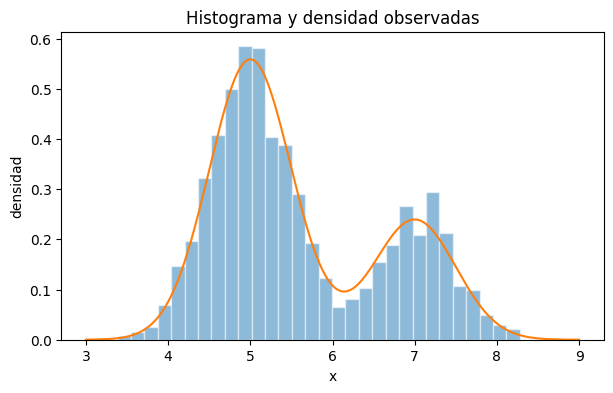

In [167]:
# Generación aleatoria de una muestra bimodal
np.random.seed(123)
x1 = np.random.normal(loc=5, scale=0.5, size=int(1500*0.70))
x2 = np.random.normal(loc=7, scale=0.5, size=int(1500*0.30))
datos = np.concatenate([x1, x2])

# Cálculo de su densidad verdadera
X_grid = np.linspace(3, 9, 1500)
densidad = (stats.norm.pdf(loc=5, scale=0.5, x=X_grid)*0.70
            + stats.norm.pdf(loc=7, scale=0.5, x=X_grid)*0.30)

# Graficamos
fig, ax = plt.subplots(figsize=(7,4))
ax.hist(datos, bins=30, density=True, alpha=0.5, edgecolor='white')
ax.plot(X_grid, densidad)
ax.set_title('Histograma y densidad observadas')
ax.set_xlabel('x')
ax.set_ylabel('densidad')
plt.show()

## Parámetro "ventana" (h)

Ajustamos la densidad de kernel con una función núcleo gaussiana para tres valores distintos de anchos de banda o "ventanas":

In [168]:
# Listas para modelos e intervalos
modelos = []
intervalos = [1,0.5,0.2]

for i in intervalos:
  # Modelo con longitud de intervalo i
  modelo_kde = skn.KernelDensity(kernel='gaussian', bandwidth=i)
  modelo_kde.fit(datos.reshape(-1,1))
  modelos.append(modelo_kde)

Con los modelos ajustados, calculamos las densidades predichas y la graficamos sobre la distribución verdadera:

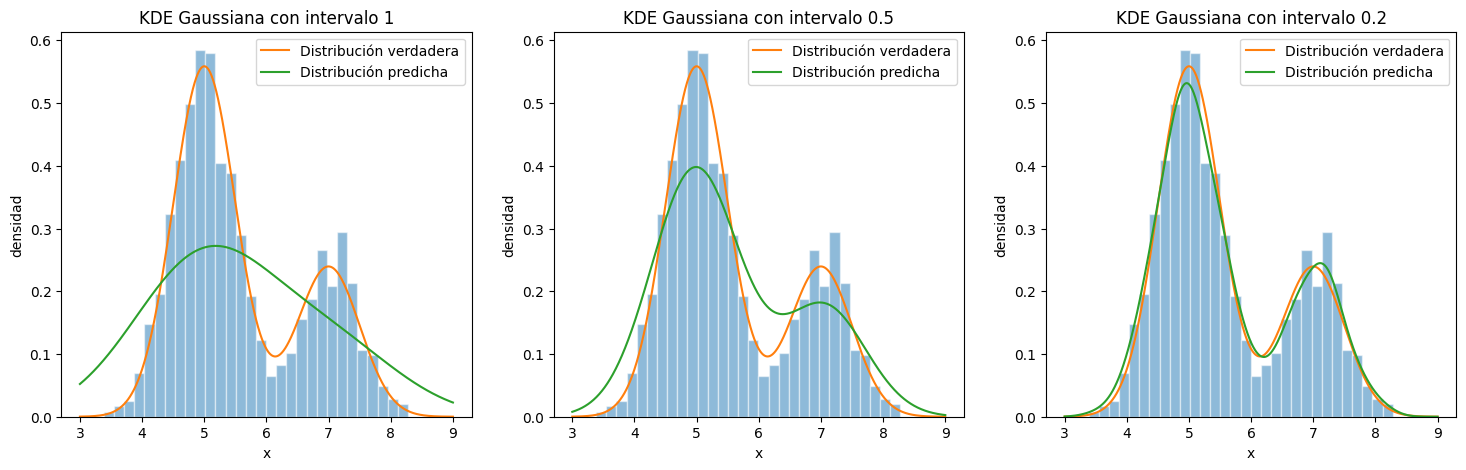

In [169]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))

for i in range(3):
  # Calculamos las densidades predichas
  log_densidad_predicha = modelos[i].score_samples(X_grid.reshape(-1,1))
  densidad_predicha = np.exp(log_densidad_predicha)

  # Graficamos
  ax[i].hist(datos, bins=30, density=True, alpha=0.5, edgecolor='white')
  ax[i].plot(X_grid, densidad, label='Distribución verdadera')
  ax[i].plot(X_grid, densidad_predicha, label='Distribución predicha')
  ax[i].set_title('KDE Gaussiana con intervalo '+str(intervalos[i]))
  ax[i].set_xlabel('x')
  ax[i].set_ylabel('densidad')
  ax[i].legend()

plt.show()

Podemos probar qué ocurre ajustando otros modelos, también con la función gaussiana, pero con anchos de banda mucho más estrechos:

In [170]:
# Listas para modelos e intervalos
modelos = []
intervalos = [0.08,0.04,0.01]

for i in intervalos:
  # Modelo con longitud de intervalo i
  modelo_kde = skn.KernelDensity(kernel='gaussian', bandwidth=i)
  modelo_kde.fit(datos.reshape(-1,1))
  modelos.append(modelo_kde)

Graficamos las densidades estimadas de kernel sobre la verdadera:

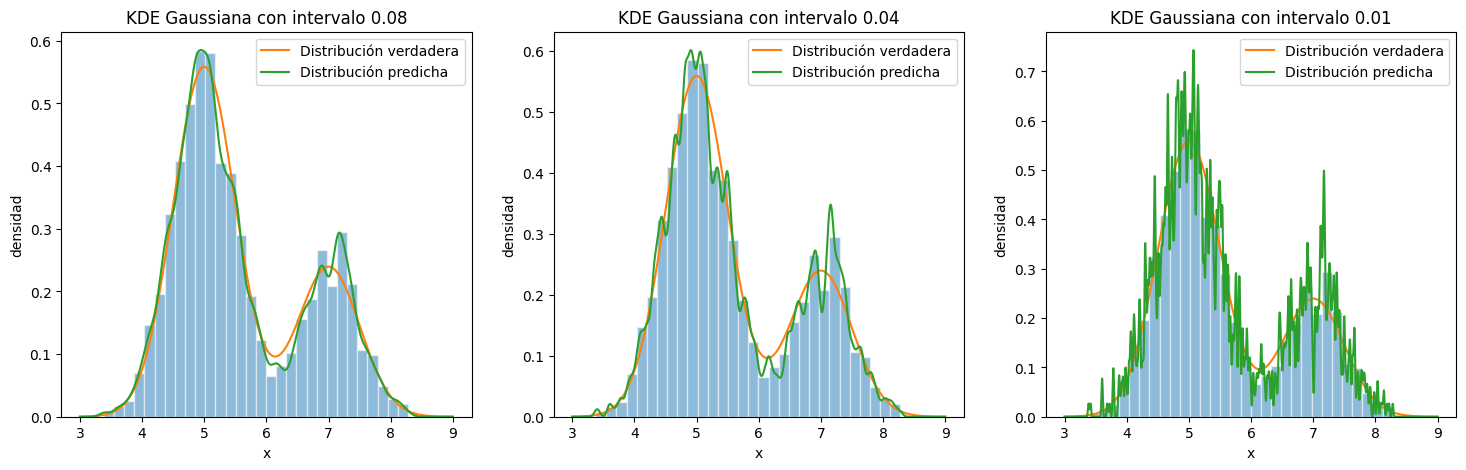

In [171]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))

for i in range(3):
  # Calculamos las densidades predichas
  log_densidad_predicha = modelos[i].score_samples(X_grid.reshape(-1,1))
  densidad_predicha = np.exp(log_densidad_predicha)

  # Graficamos
  ax[i].hist(datos, bins=30, density=True, alpha=0.5, edgecolor='white')
  ax[i].plot(X_grid, densidad, label='Distribución verdadera')
  ax[i].plot(X_grid, densidad_predicha, label='Distribución predicha')
  ax[i].set_title('KDE Gaussiana con intervalo '+str(intervalos[i]))
  ax[i].set_xlabel('x')
  ax[i].set_ylabel('densidad')
  ax[i].legend()

plt.show()

## Funciones núcleo

Con los datos generados anteriormente, podemos ver cómo ajustan las estimaciones de densidad de kernel para distintas funciones. En este caso tomamos un intervalo de 0.5, puede probarse con otros valores de intervalos. Generamos los modelos:

In [172]:
# Listas para modelos y tipos de funciones
modelos = []
funciones = ['gaussian', 'epanechnikov', 'exponential', 'linear']

for i in range(4):
  # Modelo con longitud de intervalo 0.5
  modelo_kde = skn.KernelDensity(kernel=funciones[i], bandwidth=0.5)
  modelo_kde.fit(datos.reshape(-1,1))
  modelos.append(modelo_kde)

Graficamos la distribución verdadera y las estimadas superpuestas:

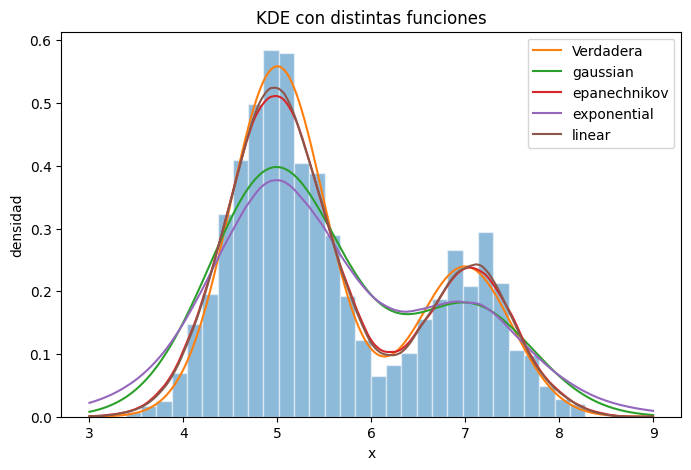

In [173]:
# Graficamos histograma y densidad verdaderas
plt.figure(figsize=(8,5))
plt.hist(datos, bins=30, density=True, alpha=0.5, edgecolor='white')
plt.plot(X_grid, densidad, label='Verdadera')
plt.title('KDE con distintas funciones')
plt.xlabel('x')
plt.ylabel('densidad')

# Superponemos densidades de kernel
for i in range(4):
  # Calculamos las densidades predichas
  log_densidad_predicha = modelos[i].score_samples(X_grid.reshape(-1,1))
  densidad_predicha = np.exp(log_densidad_predicha)
  # Graficamos
  plt.plot(X_grid, densidad_predicha, label=funciones[i])

plt.legend()
plt.show()

## KDE por validación cruzada

**Validación cruzada.**

Uno de los parámetros importantes para la función GridSearchCV y algo que van a ver recurrentemente en Data Science es el parámetro "cv" que viene de Cross Validation o Validación Cruzada en español. Este parámetro lo que hace es dividir la base en $k$ grupos. Acto seguido entrena con $k-1$ grupos y testea con el grupo faltante. Luego vuelve a repetir el proceso pero quitando otro grupo distinto. Este proceso se repite hasta que se haya realizado el testeo en cada grupo en la que dividimos la base.

Finalmente una vez que se haya iterado todas las $k$ veces, se obtiene por lo general un promedio y se elige el modelo según estemos maximizando o minimizando el mismo. Por ejemplo en el caso del error cuadrado medio buscaríamos el modelo que en promedio minimize el mismo. Para el caso de la función de kernel, la función GridSearchCV() maximiza por defecto la logverosimilitud.

In [174]:
param_grid = {'kernel': ['gaussian', 'epanechnikov', 'exponential', 'linear'],
              'bandwidth' : np.linspace(0.01, 2, 100)}

grid = GridSearchCV(estimator = skn.KernelDensity(), # Función de la densidad de kernel
                    param_grid = param_grid,         # Grid de funciones núcleo y ventanas
                    n_jobs = -1,                     # Cantidad de procesamientos en paralelo
                    cv = 10,                         # K-Folds para validación cruzada
                    verbose = -1)                    # Para no mostrar la salida
_ = grid.fit(X = datos.reshape((-1,1)))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [-223.69259556          -inf -215.9086626           -inf -211.16765106
          -inf -210.32186513          -inf -209.53089941          -inf
 -209.31027016          -inf -209.07061564          -inf -208.93029339
          -inf -208.87278469          -inf -208.7733177           -inf
 -208.75337912 -209.32013911 -208.75303782 -209.56345323 -208.68996738
 -209.17894876 -208.8490956  -209.32608073 -208.68536332 -209.10037205
 -209.05675971 -209.18644415 -208.74413634 -209.03161818 -209.373408
 -209.08090601 -208.86961244 -208.99375208 -209.79444593 -209.01651998
 -209.06386617 -208.92395813 -210.3125299  -208.93995565 -209.32825558
 -208.83617501 -210.9180857  -208.8578046  -209.66376086 -208.78497087
 -211.60023049 -208.80131967 -210.07093958 -208.74130029 -212.34767699
 -208.752066   -210.54968149 -208.68935482 -213.14944853 -208.6995828
 -211.09896

In [175]:
grid.best_params_

{'bandwidth': 0.3718181818181818, 'kernel': 'linear'}

Estimamos la función de densidad de kernel con el mejor estimador hallado por validación cruzada:

In [180]:
log_densidad_predicha = grid.best_estimator_.score_samples(X_grid.reshape(-1,1))
densidad_predicha = np.exp(log_densidad_predicha)

Superponemos función de densidad verdadera y predicha:

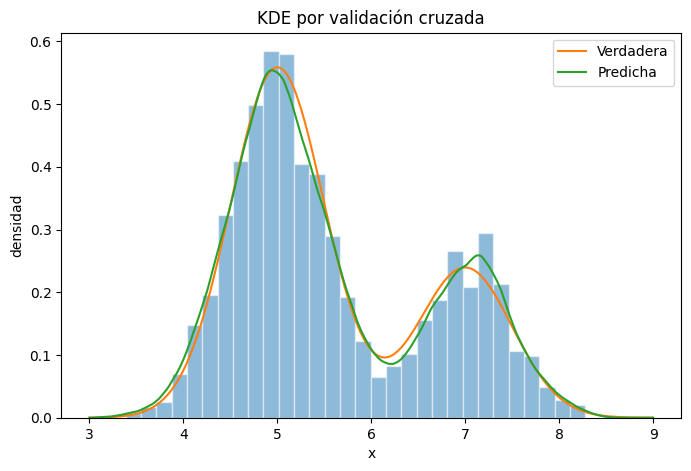

In [181]:
plt.figure(figsize=(8,5))
plt.hist(datos, bins=30, density=True, alpha=0.5, edgecolor='white')
plt.plot(X_grid, densidad, label='Verdadera')
plt.plot(X_grid, densidad_predicha, label='Predicha')
plt.title('KDE por validación cruzada')
plt.xlabel('x')
plt.ylabel('densidad')
plt.legend()
plt.show()

## Algunos ejemplos

Establecemos conexión a Google Drive para cargar la base de datos "usu_individual_T323.txt"

In [182]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Nos posicionamos en el directorio donde esta la base
%cd '/content/drive/MyDrive/Diplomatura Ciencia de Datos FaCENA - Módulo 2'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1scPBK7RIOW7jmjjGCi452DkKLldnJd7A/Diplomatura Ciencia de Datos FaCENA - Módulo 2


Para setear localmente: descomentar y colocar su path en la siguiente instrucción:

In [ ]:
#os.chdir('')

### 1) Tiempos de espera

Cargamos una base de datos con una variable de tiempos de espera entre erupciones de un volcán.

La misma está cargada en el programa R bajo el comando faithful, de ahí el nombre del archivo.

In [183]:
datos = pd.read_excel('Bases/Faithful_R.xlsx')
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eruptions  272 non-null    float64
 1   waiting    272 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


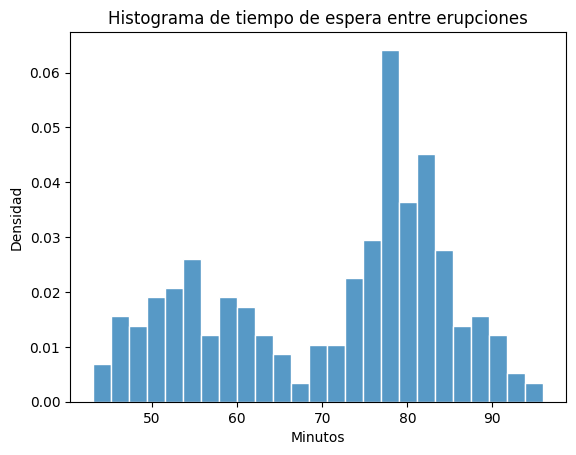

In [184]:
sns.histplot(data=datos, x='waiting', stat='density', bins=25, edgecolor='white')
plt.title('Histograma de tiempo de espera entre erupciones')
plt.xlabel('Minutos')
plt.ylabel('Densidad')
plt.show()

La librería seaborn cuenta con una función kdeplot() que grafica la densidad de kernet de manera automática usando como función núcleo la gaussiana. La aplicamos sobre nuestra distribución de los minutos de espera entre erupciones:

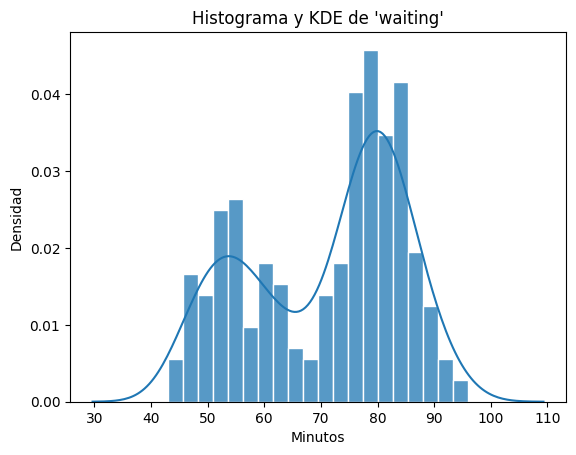

In [186]:
sns.histplot(data=datos, x='waiting', stat='density', bins=20, edgecolor='white')
sns.kdeplot(data=datos, x='waiting')
plt.title("Histograma y KDE de 'waiting'")
plt.xlabel('Minutos')
plt.ylabel('Densidad')
plt.show()

**Función núcleo gaussiana para distintas ventanas**

In [198]:
# Listas para modelos y anchos de banda
modelos = []
intervalos = [0.08,0.5,3]

for i in intervalos:
  # Modelo con longitud de intervalo i
  modelo_kde = skn.KernelDensity(kernel='gaussian', bandwidth=i)
  modelo_kde.fit(datos['waiting'].values.reshape(-1,1))
  modelos.append(modelo_kde)

Graficamos las densidades estimadas por kernel sobre la verdadera:

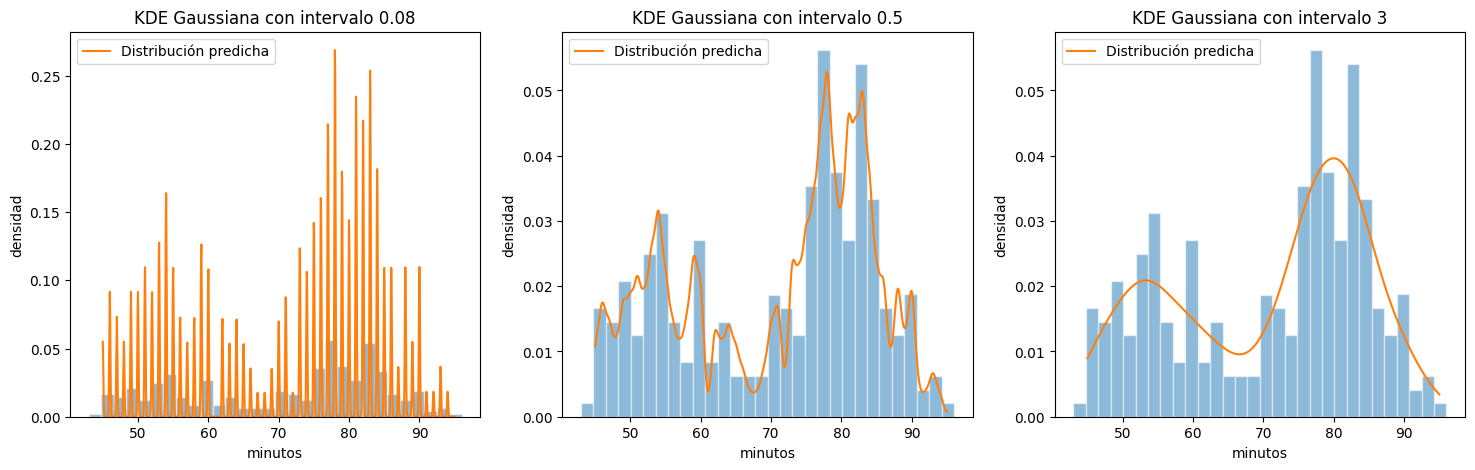

In [200]:
X_grid = np.linspace(45, 95, 1000)
fig, ax = plt.subplots(1, 3, figsize=(18,5))

for i in range(3):
  # Calculamos las densidades predichas
  log_densidad_predicha = modelos[i].score_samples(X_grid.reshape(-1,1))
  densidad_predicha = np.exp(log_densidad_predicha)

  # Graficamos
  ax[i].hist(datos['waiting'], bins=30, density=True, alpha=0.5, edgecolor='white')
  ax[i].plot(X_grid, densidad_predicha, label='Distribución predicha')
  ax[i].set_title('KDE Gaussiana con intervalo '+str(intervalos[i]))
  ax[i].set_xlabel('minutos')
  ax[i].set_ylabel('densidad')
  ax[i].legend()

plt.show()

**Distintas funciones núcleo con una ventana de 3**

In [196]:
# Listas para modelos y funciones núcleo
modelos = []
funciones = ['epanechnikov', 'exponential', 'linear']

for i in range(3):
  # Modelo con longitud de intervalo i
  modelo_kde = skn.KernelDensity(kernel=funciones[i], bandwidth=3)
  modelo_kde.fit(datos['waiting'].values.reshape(-1,1))
  modelos.append(modelo_kde)

Graficamos las densidades estimadas por kernel sobre la verdadera:

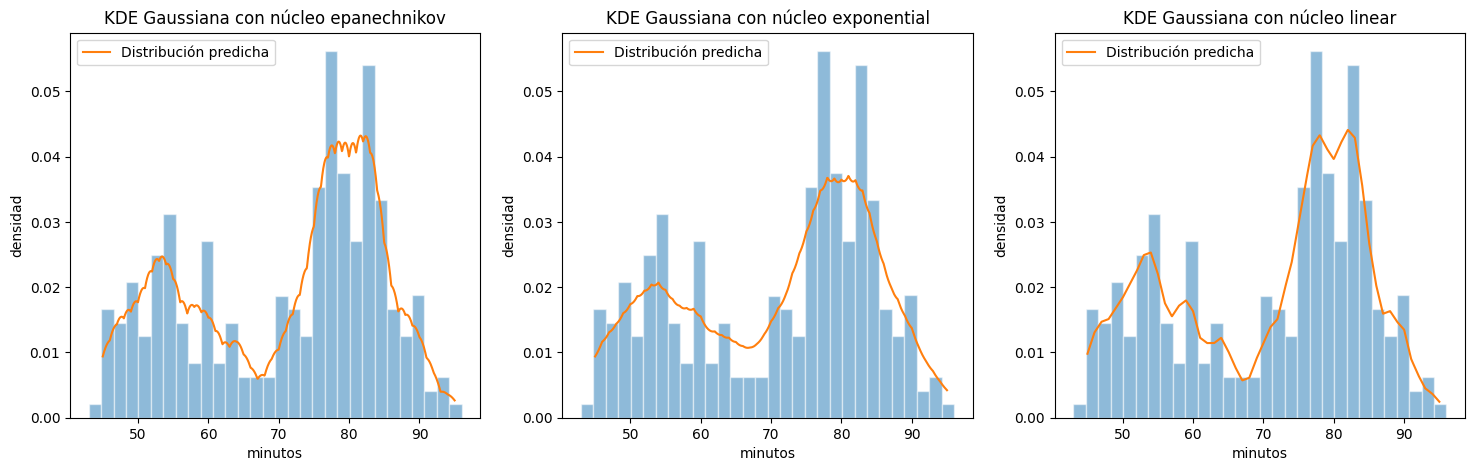

In [197]:
X_grid = np.linspace(45, 95, 1000)
fig, ax = plt.subplots(1, 3, figsize=(18,5))

for i in range(3):
  # Calculamos las densidades predichas
  log_densidad_predicha = modelos[i].score_samples(X_grid.reshape(-1,1))
  densidad_predicha = np.exp(log_densidad_predicha)

  # Graficamos
  ax[i].hist(datos['waiting'], bins=30, density=True, alpha=0.5, edgecolor='white')
  ax[i].plot(X_grid, densidad_predicha, label='Distribución predicha')
  ax[i].set_title('KDE Gaussiana con núcleo '+str(funciones[i]))
  ax[i].set_xlabel('minutos')
  ax[i].set_ylabel('densidad')
  ax[i].legend()

plt.show()

### 2) Variable edad

Cargamos la base de datos:

In [191]:
datos_eph = pd.read_table('Bases/usu_individual_T323.txt', sep=';', decimal=',')
datos_eph.head()

<ipython-input-191-946d2ab94820>:1: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_eph = pd.read_table('Bases/usu_individual_T323.txt', sep=';', decimal=',')


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPSSHJOKSCDEFOCD00804371,2023,3,1,5,1,41,N,8,341,...,2.0,4,24000.0,1,1.0,1,NaN,1.0,1,418
1,TQSMNORWTHJMKTCDEFOCD00804372,2023,3,1,1,1,41,N,8,339,...,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0
2,TQSMNORWTHJMKTCDEFOCD00804372,2023,3,1,3,1,41,N,8,339,...,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0
3,TQSMNORWTHJMKTCDEFOCD00804372,2023,3,1,2,1,41,N,8,339,...,12.0,12,0.0,12,12.0,12,NaN,12.0,12,0
4,TQRMNOSQQHMMKUCDEIMBF00813017,2023,3,1,1,1,43,N,36,143,...,4.0,5,50000.0,2,2.0,2,NaN,2.0,2,168


Filtramos por categoría de inactividad para Jubilados/Pensionados (1) y Estudiantes (3):

In [192]:
datos_eph = datos_eph[(datos_eph['CAT_INAC']==1) | (datos_eph['CAT_INAC']==3)]

Vemos histograma de la distribución de edad por categoría de inactividad:

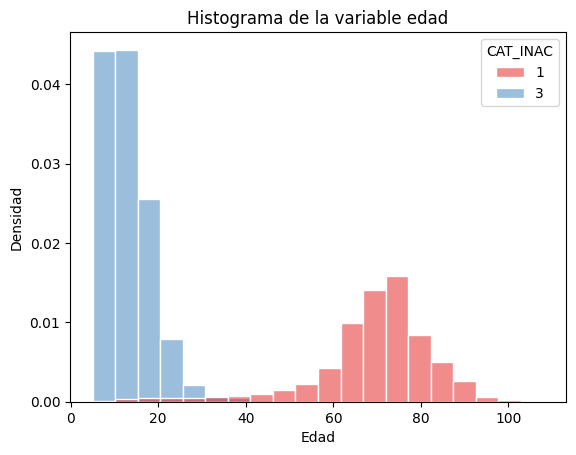

In [194]:
sns.histplot(data=datos_eph, x='CH06', hue='CAT_INAC', weights='PONDERA',
             stat='density', bins=20, palette = "Set1", edgecolor='white')
plt.title('Histograma de la variable edad')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()

Graficamos la función de densidad de kernel con la función kdeplot() de seaborn:

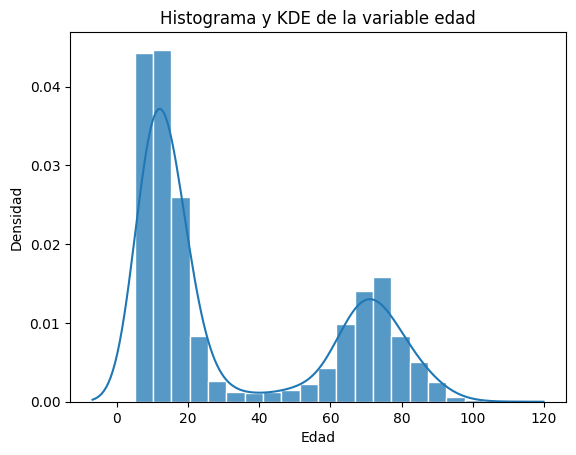

In [ ]:
sns.histplot(data=datos_eph, x='CH06', weights='PONDERA', stat='density', bins=20, edgecolor='white')
sns.kdeplot(data=datos_eph, x='CH06', weights='PONDERA')
plt.title('Histograma y KDE de la variable edad')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.show()